In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skewnorm

In [30]:
uniform = np.random.uniform(size=1000)
normal = np.random.normal(size=1000)
bimodal = concatenate((np.random.normal(1,.2,5000),np.random.normal(2,.2,2500)))
neg_skew = skewnorm.rvs(-10, size=1000)
pos_skew = skewnorm.rvs(10, size=1000)

Text(0.5, 0, 'generated data')

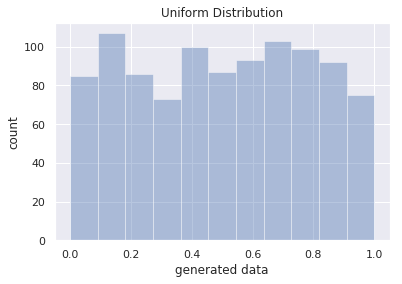

In [12]:
sns.set()
ax = sns.distplot(uniform, kde=False)
ax.set_title("Uniform Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

Text(0.5, 0, 'generated data')

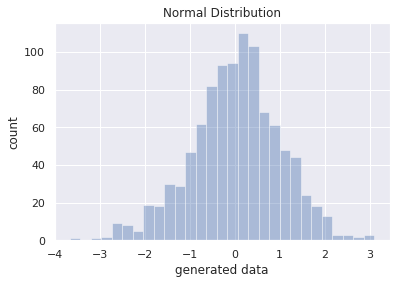

In [13]:
ax = sns.distplot(normal, kde=False)
ax.set_title("Normal Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

Text(0.5, 0, 'generated data')

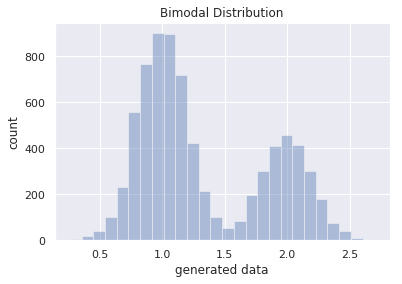

In [27]:
ax = sns.distplot(bimodal, kde=False)
ax.set_title("Bimodal Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

Text(0.5, 0, 'generated data')

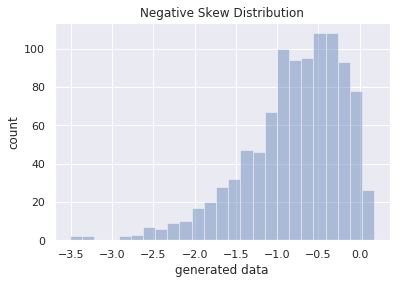

In [33]:
ax = sns.distplot(neg_skew, kde=False)
ax.set_title("Negative Skew Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

Text(0.5, 0, 'generated data')

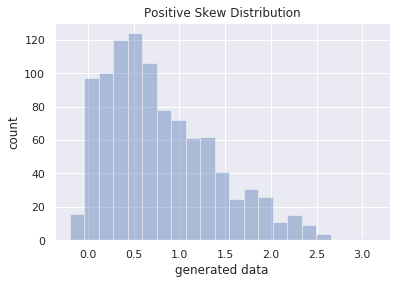

In [32]:
ax = sns.distplot(pos_skew, kde=False)
ax.set_title("Positive Skew Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

Text(0.5, 0, 'generated data')

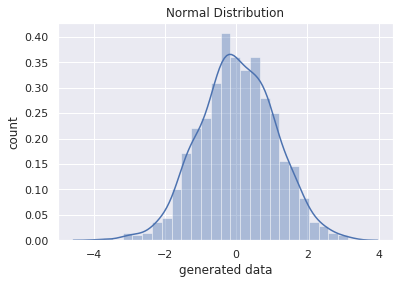

In [34]:
ax = sns.distplot(normal, kde=True)
ax.set_title("Normal Distribution")
ax.set_ylabel('count')
ax.set_xlabel('generated data')

In [35]:
import pandas as pd
import sqlite3

# connect to the dataset
myDB = './data/cephalopod_RnD.db'
connection = sqlite3.connect(myDB)

# read the data into a dataframe
mySQL = "SELECT * FROM spady_defense" 
df = pd.read_sql(mySQL, connection)
df['TimetoReact'] = pd.to_numeric(df['TimetoReact'], errors='coerce')
df.drop(['field8', 'field9', 'field10', 'field11', 'field12'], axis=1, inplace=True)

Text(0.5, 0, 'Lines crossed.')

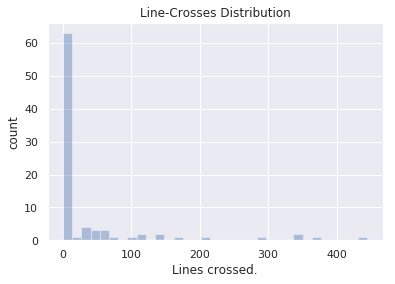

In [36]:
import seaborn as sns
ax = sns.distplot(df['LineCrosses'], kde=False)
ax.set_title("Line-Crosses Distribution")
ax.set_ylabel('count')
ax.set_xlabel('Lines crossed.')


In [42]:
from scipy.stats import kruskal
control = df[df['Treatment'] == 'Control']
elevated = df[df['Treatment'] != 'Control']
stats.kruskal(control['LineCrosses'], elevated['LineCrosses'])


KruskalResult(statistic=5.525791176857048, pvalue=0.0187381272310779)

In [43]:
len(elevated)

56

In [47]:
from scipy.stats import sem, t
from scipy import mean

std_err = sem(control['LineCrosses'])
ci = std_err * t.ppf((1 + 0.95) / 2, len(control) - 1)
control_CI = [mean(control['LineCrosses']) - ci, mean(control['LineCrosses']) + ci]

std_err = sem(elevated['LineCrosses'])
ci = std_err * t.ppf((1 + 0.95) / 2, len(elevated) - 1)
elevated_CI = [mean(elevated['LineCrosses']) - ci, mean(elevated['LineCrosses']) + ci]

print("The CI of Control: %s" % control_CI)
print("The CI of Elevated: %s" % elevated_CI)


The CI of Control: [-1.4386676687982831, 19.5676999268628]
The CI of Elevated: [26.913956290802975, 84.58604370919703]
